# Data cleaning

## Loading the data

In [4]:
import pandas as pd
import numpy as np

fraud_path = "../data/raw/Fraud_Data.csv"
ip_path = "../data/raw/IpAddress_to_Country.csv"

fraud_df = pd.read_csv(fraud_path)
ip_df = pd.read_csv(ip_path)



## shape and info of the fraud data 

In [5]:
fraud_df.shape, fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


((151112, 11), None)

## shape and info if the IP data

In [6]:
ip_df.shape, ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


((138846, 3), None)

## Cleaning Fraud_Data.csv

In [7]:
fraud_df.duplicated().sum()

np.int64(0)

In [8]:
ip_df.duplicated().sum()

np.int64(0)

In [9]:
fraud_df = fraud_df.drop_duplicates()
ip_df = ip_df.drop_duplicates()

## Fix Data Types

In [10]:
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB


## Handling Missing Values

why medians?
* Robust to outliers and preserves fraud cases

In [11]:
fraud_df['age'] = fraud_df['age'].fillna(fraud_df['age'].median())

## imputing Categorical Features

In [12]:
categorical_cols = ['browser', 'source', 'sex']

for col in categorical_cols:
    fraud_df[col] = fraud_df[col].fillna('Unknown')


## Validating age and perchase values

In [13]:
fraud_df = fraud_df[
    (fraud_df['age'] > 0) &
    (fraud_df['purchase_value'] > 0)
]


## Converting IP addresses to integers

In [14]:
fraud_df['ip_address'] = fraud_df['ip_address'].astype(np.int64)


## Cleaning IP mapping data

### Convertng IP ranges

In [15]:
ip_df['lower_bound_ip_address'] = ip_df['lower_bound_ip_address'].astype(np.int64)
ip_df['upper_bound_ip_address'] = ip_df['upper_bound_ip_address'].astype(np.int64)

### Dropping duplicates

In [16]:
ip_df = ip_df.drop_duplicates()

## cleaning check

In [17]:
fraud_df.isna().sum()
fraud_df.duplicated().sum()


np.int64(0)

## Saving cleaned data

In [18]:
fraud_df.to_csv("../data/processed/fraud_clean.csv", index=False)
ip_df.to_csv("../data/processed/ip_clean.csv", index=False)

# Exploratory Data Analysis (EDA)

## Univariate analysis

In [19]:
import pandas as pd
import numpy as np

In [20]:
df_fraud = pd.read_csv("../data/processed/fraud_clean.csv")
print('Processed Fraud data loaded successfully...')

Processed Fraud data loaded successfully...


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (10, 6)

## Class Distribution Analysis (Imbalance)

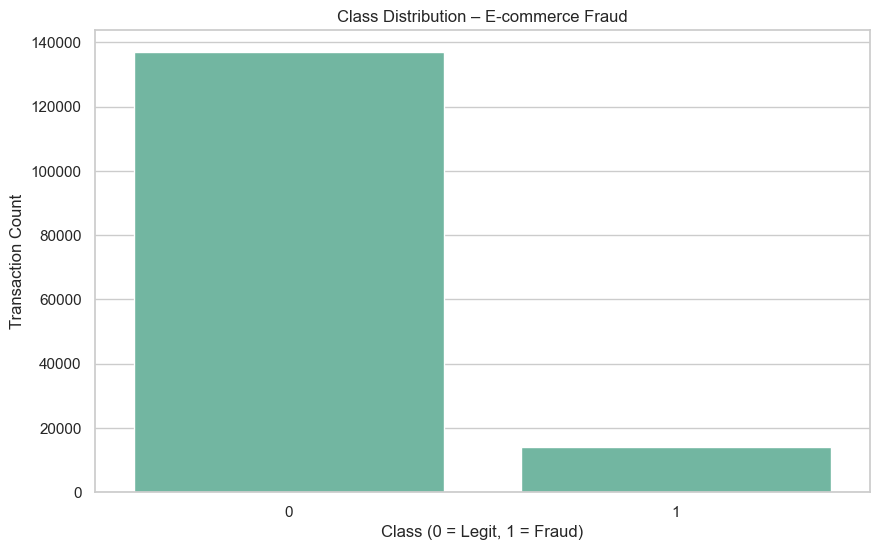

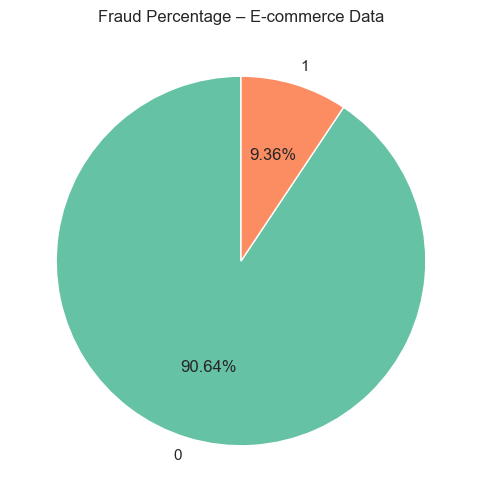

In [22]:
plt.figure()
sns.countplot(x='class', data=df_fraud)
plt.title("Class Distribution – E-commerce Fraud")
plt.xlabel("Class (0 = Legit, 1 = Fraud)")
plt.ylabel("Transaction Count")
plt.show()

# Pie chart Representation

(df_fraud['class']
 .value_counts(normalize=True)
 .mul(100)
 .plot(kind='pie', autopct='%1.2f%%', startangle=90)
)
plt.title("Fraud Percentage – E-commerce Data")
plt.ylabel("")
plt.show()


## Categorical and Numerical columns

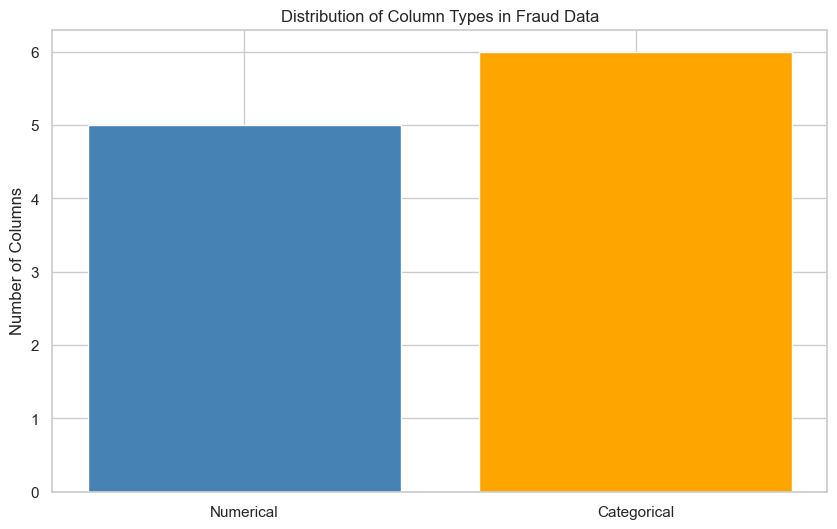

Numerical Columns:
Index(['user_id', 'purchase_value', 'age', 'ip_address', 'class'], dtype='object')

Categorical Columns:
Index(['signup_time', 'purchase_time', 'device_id', 'source', 'browser',
       'sex'],
      dtype='object')


In [23]:
numerical_cols = df_fraud.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_fraud.select_dtypes(include=['object']).columns

col_types = {
    "Numerical": len(numerical_cols),
    "Categorical": len(categorical_cols)
}

plt.figure()
plt.bar(col_types.keys(), col_types.values(), color=['steelblue', 'orange'])
plt.title("Distribution of Column Types in Fraud Data")
plt.ylabel("Number of Columns")
plt.show()


print("Numerical Columns:")
print(numerical_cols)

print("\nCategorical Columns:")
print(categorical_cols)


## Distributions

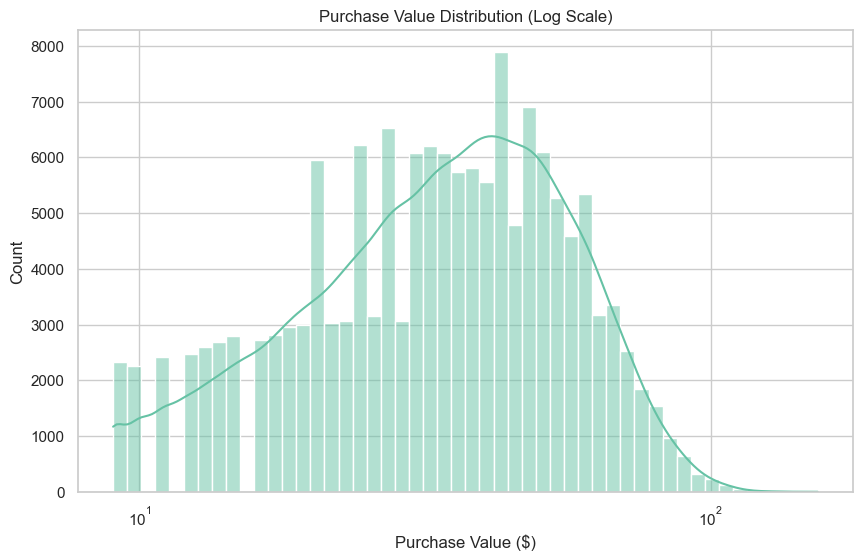

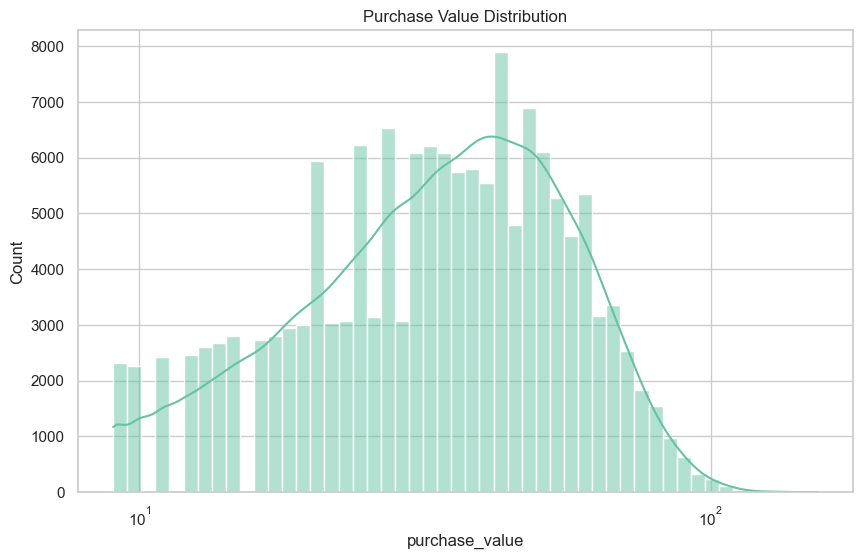

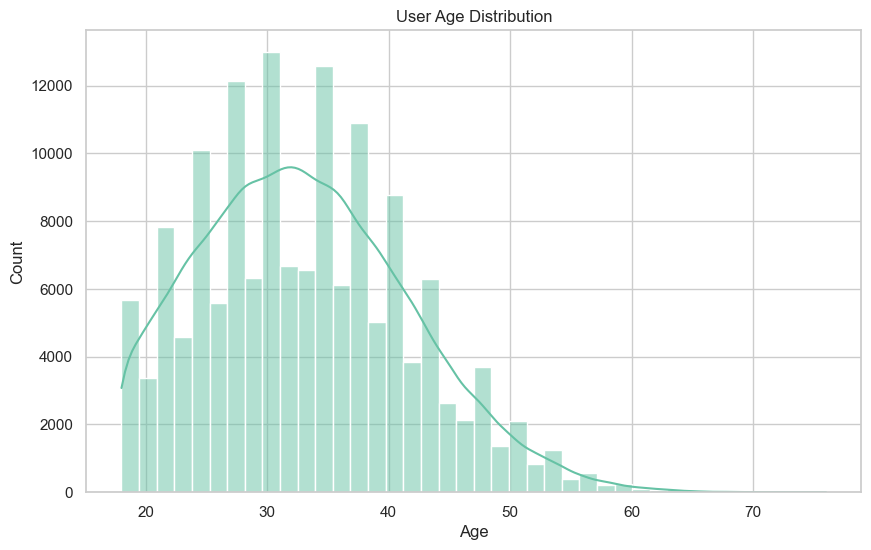

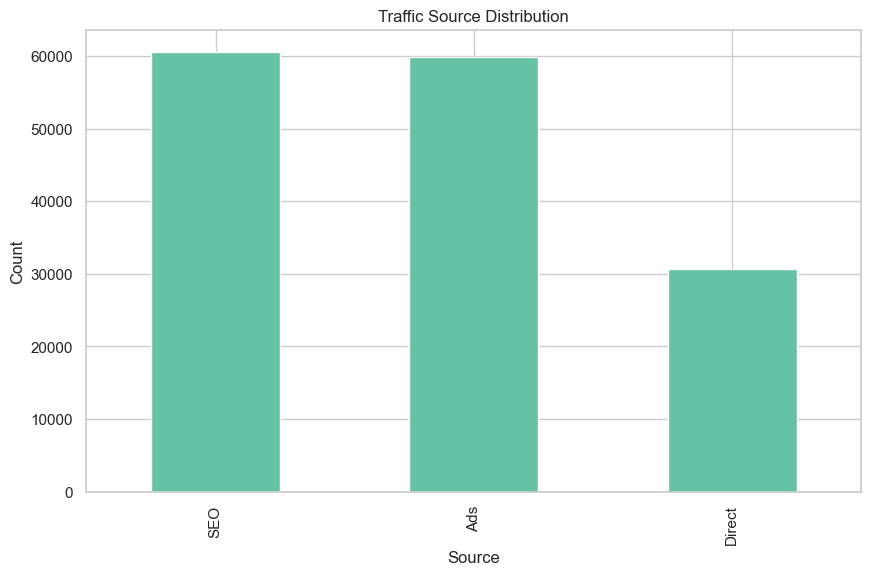

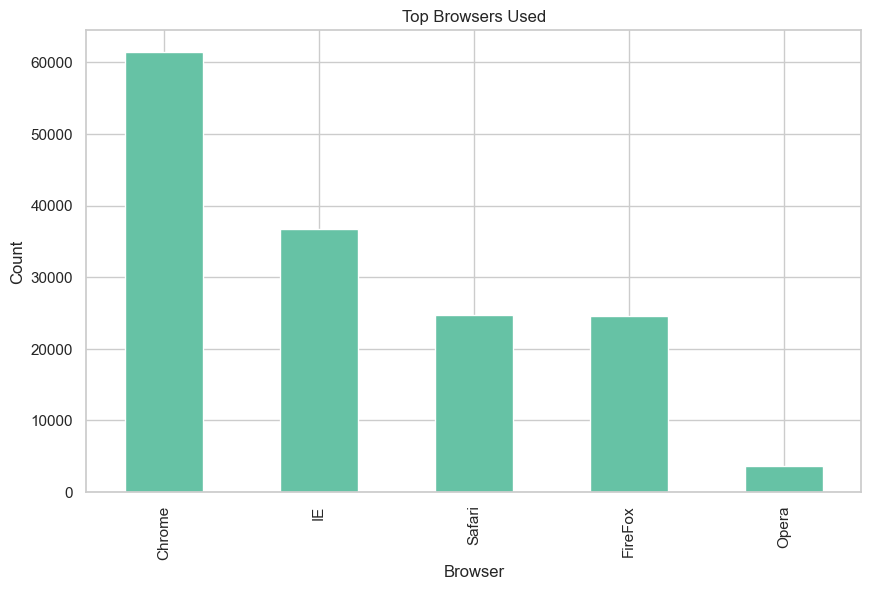

In [24]:
# Purchase value Distribution
plt.figure()
sns.histplot(df_fraud['purchase_value'], bins=50, kde=True, log_scale=True)
plt.title("Purchase Value Distribution (Log Scale)")
plt.xlabel("Purchase Value ($)")
plt.show()

sns.histplot(df_fraud['purchase_value'], bins=50, kde=True, log_scale=True)
plt.title("Purchase Value Distribution")
plt.show()

# Age Distribution
plt.figure()
sns.histplot(df_fraud['age'], bins=40, kde=True)
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.show()

# Traffic Source
plt.figure()
df_fraud['source'].value_counts().plot(kind='bar')
plt.title("Traffic Source Distribution")
plt.xlabel("Source")
plt.ylabel("Count")
plt.show()

# Browser Distribution

plt.figure()
df_fraud['browser'].value_counts().head(10).plot(kind='bar')
plt.title("Top Browsers Used")
plt.xlabel("Browser")
plt.ylabel("Count")
plt.show()



In [25]:
df_ip = pd.read_csv("../data/processed/ip_clean.csv")

## Bivariate analysis

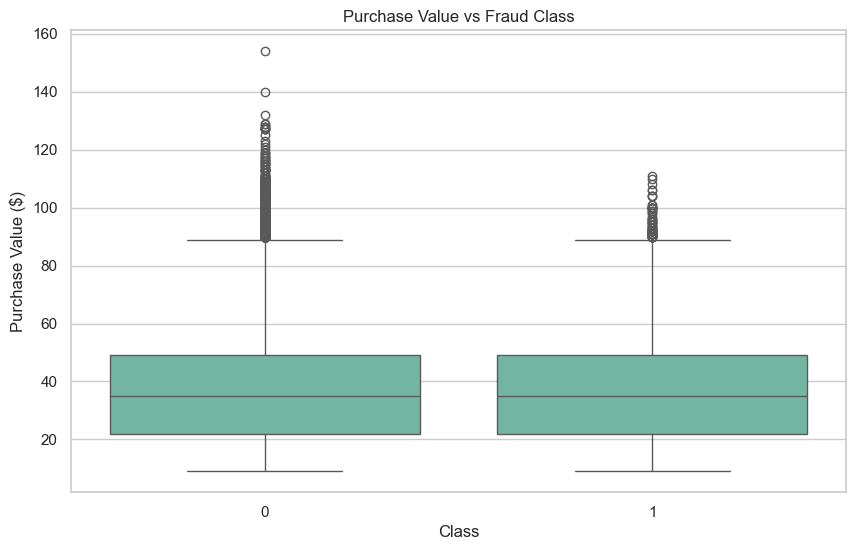

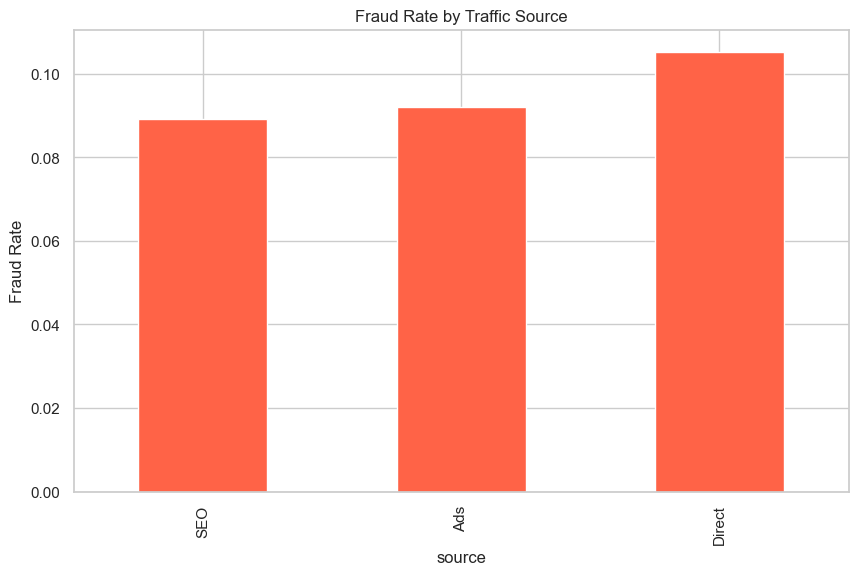

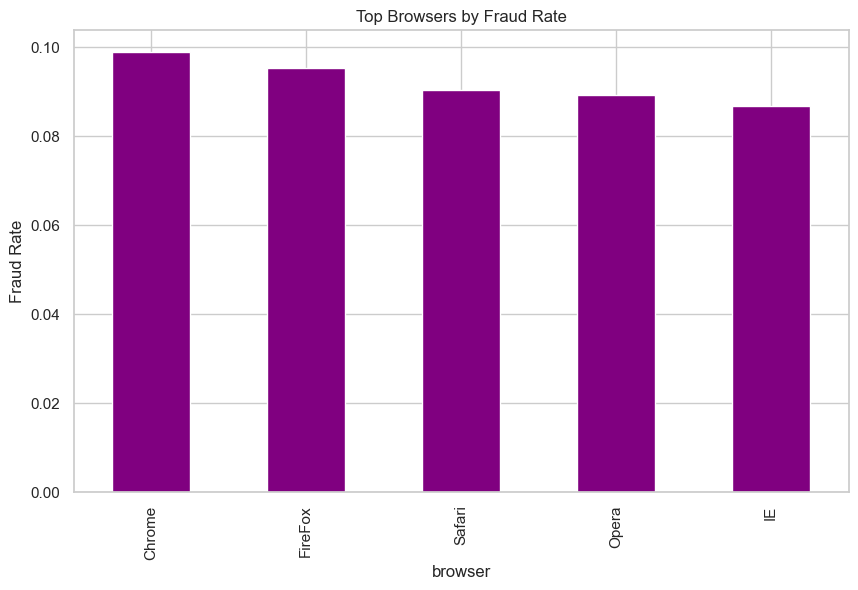

In [26]:
# Purchase Value vs Fraud
plt.figure()
sns.boxplot(x='class', y='purchase_value', data=df_fraud)
plt.title("Purchase Value vs Fraud Class")
plt.xlabel("Class")
plt.ylabel("Purchase Value ($)")
plt.show()

# Fraud Rate by Traffic Source
fraud_by_source = df_fraud.groupby('source')['class'].mean().sort_values()

plt.figure()
fraud_by_source.plot(kind='bar', color='tomato')
plt.title("Fraud Rate by Traffic Source")
plt.ylabel("Fraud Rate")
plt.show()

# Fraud Rate by Browser
fraud_by_browser = (
    df_fraud.groupby('browser')['class']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
fraud_by_browser.plot(kind='bar', color='purple')
plt.title("Top Browsers by Fraud Rate")
plt.ylabel("Fraud Rate")
plt.show()




## Correlation Heatmap

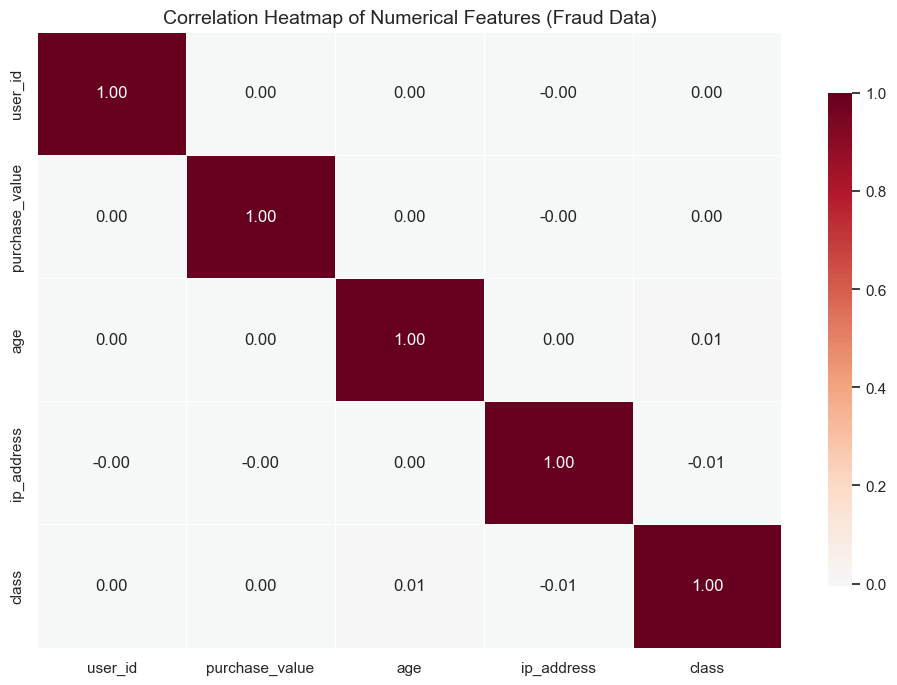

In [27]:
# Select numerical columns only
num_df = df_fraud.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr = num_df.corr()
plt.figure(figsize=(12, 8))

sns.heatmap(
    corr,
    cmap="RdBu_r",          # Very distinguishable red-blue
    center=0,               # Zero-centered
    annot=True,             # Show correlation values
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap of Numerical Features (Fraud Data)", fontsize=14)
plt.show()



## Converting IP Addresses to Integer Format

### ip_address → ip_int

In [28]:
import ipaddress

# Convert fraud IPs to integer
df_fraud['ip_int'] = df_fraud['ip_address'].apply(
    lambda x: int(ipaddress.IPv4Address(x))
)

# ✔ Required for correct range lookup
# ✔ Safe & deterministic conversion

### Sort IP Ranges 

In [29]:
ip_df = pd.read_csv("../data/processed/ip_clean.csv")

In [30]:
ip_df = ip_df.sort_values('lower_bound_ip_address').reset_index(drop=True)

## Range-Based Merge

* why range-based merge?
    * Fast (no loops)
    * Industry-standard approach
    * Works on large datasets

In [31]:
df_fraud = pd.merge_asof(
    df_fraud.sort_values('ip_int'),
    ip_df[['lower_bound_ip_address', 'upper_bound_ip_address', 'country']],
    left_on='ip_int',
    right_on='lower_bound_ip_address',
    direction='backward'
)

# Keep only valid IP ranges
df_fraud = df_fraud[
    df_fraud['ip_int'] <= df_fraud['upper_bound_ip_address']
]


## Handling missing countries 

In [32]:
df_fraud['country'] = df_fraud['country'].fillna('Unknown')

## Validating the merge 

* This shows that data is now merged and I can now can do analysis on realted columns of the two datasets

In [33]:
df_fraud['country'].value_counts().head(10)

country
United States        58049
China                12038
Japan                 7306
United Kingdom        4490
Korea Republic of     4162
Germany               3646
France                3161
Canada                2975
Brazil                2961
Italy                 1944
Name: count, dtype: int64

## Fraud analysis by country after the two data have been merged 

C:\Users\hp\AppData\Local\Temp\ipykernel_16796\3959511592.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


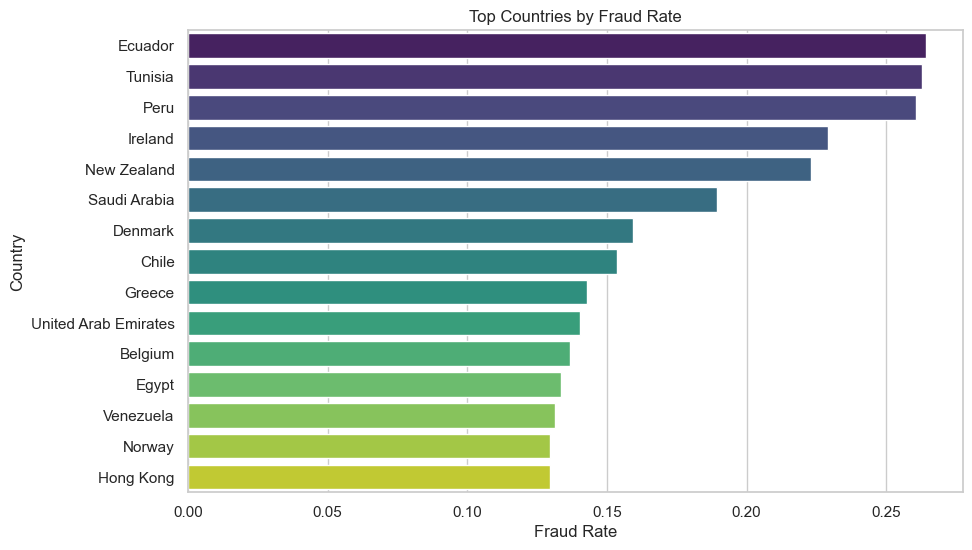

In [34]:
country_fraud = (
    df_fraud.groupby('country')['class']
    .agg(['count', 'mean'])
    .reset_index()
    .rename(columns={'mean': 'fraud_rate'})
)

# Filter countries with enough data
country_fraud = country_fraud[country_fraud['count'] > 100]

plt.figure(figsize=(10, 6))

top_countries = country_fraud.sort_values(
    'fraud_rate', ascending=False
).head(15)

sns.barplot(
    data=top_countries,
    x='fraud_rate',
    y='country',
    palette='viridis'
)

plt.title("Top Countries by Fraud Rate")
plt.xlabel("Fraud Rate")
plt.ylabel("Country")
plt.show()



### Transaction volume vs Fraud rate

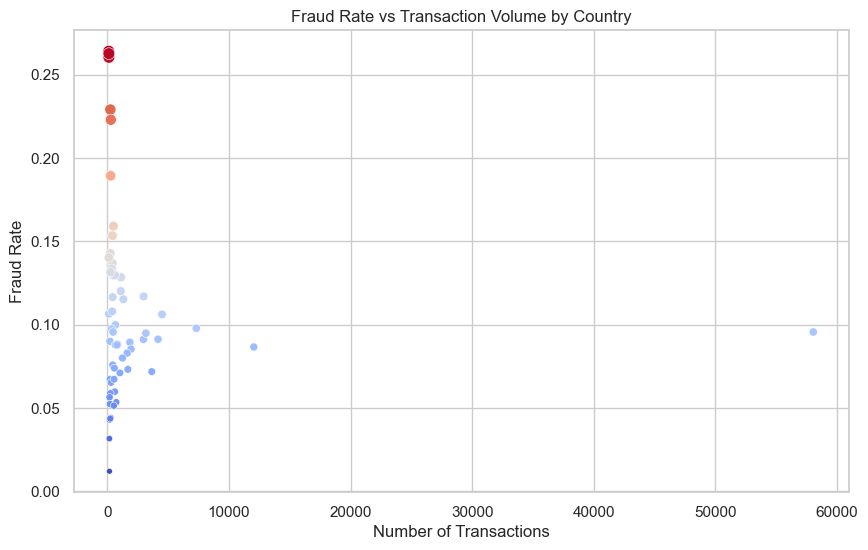

In [35]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=country_fraud,
    x='count',
    y='fraud_rate',
    size='fraud_rate',
    hue='fraud_rate',
    palette='coolwarm',
    legend=False
)

plt.title("Fraud Rate vs Transaction Volume by Country")
plt.xlabel("Number of Transactions")
plt.ylabel("Fraud Rate")
plt.show()


## Feature Engineering Fraud Data

### Ensure Time Columns Are Proper Datetime

In [36]:
df_fraud['signup_time'] = pd.to_datetime(df_fraud['signup_time'])
df_fraud['purchase_time'] = pd.to_datetime(df_fraud['purchase_time'])

### Time-Based Features

In [38]:
df_fraud['hour_of_day'] = df_fraud['purchase_time'].dt.hour

### Day of Week (Weekend vs weekday behavior)

In [39]:
df_fraud['day_of_week'] = df_fraud['purchase_time'].dt.dayofweek

### Time Since Signup (High-risk indicator)

In [40]:
df_fraud['time_since_signup'] = (
    df_fraud['purchase_time'] - df_fraud['signup_time']
).dt.total_seconds() / 3600  # hours

## Transaction Frequency & Velocity

In [41]:
# Sorting data
df_fraud = df_fraud.sort_values(
    ['user_id', 'purchase_time']
)
# Transactions per User
df_fraud['user_tx_count'] = (
    df_fraud.groupby('user_id')['purchase_time']
    .transform('count')
)

# Transaction Velocity (Time Between Purchases)
df_fraud['time_since_last_tx'] = (
    df_fraud.groupby('user_id')['purchase_time']
    .diff()
    .dt.total_seconds() / 60  # minutes
)
# Handle first transactions
df_fraud['time_since_last_tx'] = df_fraud['time_since_last_tx'].fillna(-1)



## Transactions in Short Time Windows

In [42]:
# Make a copy to avoid index issues
df_fraud = df_fraud.sort_values(['user_id', 'purchase_time'])

# Set purchase_time as index temporarily
df_fraud.set_index('purchase_time', inplace=True)

# Compute transactions in last 1 hour per user
df_fraud['tx_1h'] = (
    df_fraud.groupby('user_id')['user_id']  # group by user
    .rolling('1H')                          # 1-hour rolling window
    .count()                                # count transactions
    .reset_index(level=0, drop=True)        # reset index to align with df_fraud
)

# Compute transactions in last 24 hours
df_fraud['tx_24h'] = (
    df_fraud.groupby('user_id')['user_id']
    .rolling('24H')
    .count()
    .reset_index(level=0, drop=True)
)

# Reset index back to normal
df_fraud.reset_index(inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_16796\3465603676.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .rolling('1H')                          # 1-hour rolling window
C:\Users\hp\AppData\Local\Temp\ipykernel_16796\3465603676.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .rolling('24H')


## Transactions in last 24 hours

In [44]:
df_fraud = df_fraud.sort_values(['user_id', 'purchase_time']).reset_index(drop=True)

# Time since last transaction per user
df_fraud['time_since_last_tx'] = (
    df_fraud.groupby('user_id')['purchase_time']
    .diff()
    .dt.total_seconds() / 60  # minutes
)

# Fill first transactions
df_fraud['time_since_last_tx'] = df_fraud['time_since_last_tx'].fillna(-1)


## Correctness check

| Features             | Fraud Signal        |
| -------------------- | ------------------- |
| `time_since_signup`  | New account abuse   |
| `time_since_last_tx` | Rapid-fire attacks  |
| `tx_1h`, `tx_24h`    | Burst behavior      |
| `hour_of_day`        | Automated activity  |
| `day_of_week`        | Behavioral patterns |


In [45]:
df_fraud[
    [
        'hour_of_day',
        'day_of_week',
        'time_since_signup',
        'user_tx_count',
        'time_since_last_tx',
        'tx_1h',
        'tx_24h'
    ]
].describe()


,hour_of_day,day_of_week,time_since_signup,user_tx_count,time_since_last_tx,tx_1h,tx_24h
count,129146.000000,129146.000000,129146.000000,129146.0,129146.0,129146.0,129146.0
mean,11.507333,3.013643,1368.680636,1.0,-1.0,1.0,1.0
std,6.910243,2.007088,869.341295,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000278,1.0,-1.0,1.0,1.0
25%,6.000000,1.000000,605.618681,1.0,-1.0,1.0,1.0
50%,12.000000,3.000000,1368.144861,1.0,-1.0,1.0,1.0
75%,17.000000,5.000000,2123.208472,1.0,-1.0,1.0,1.0
max,23.000000,6.000000,2879.992222,1.0,-1.0,1.0,1.0


### Fraud vs Time Since Signup

C:\Users\hp\AppData\Local\Temp\ipykernel_16796\3534455198.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


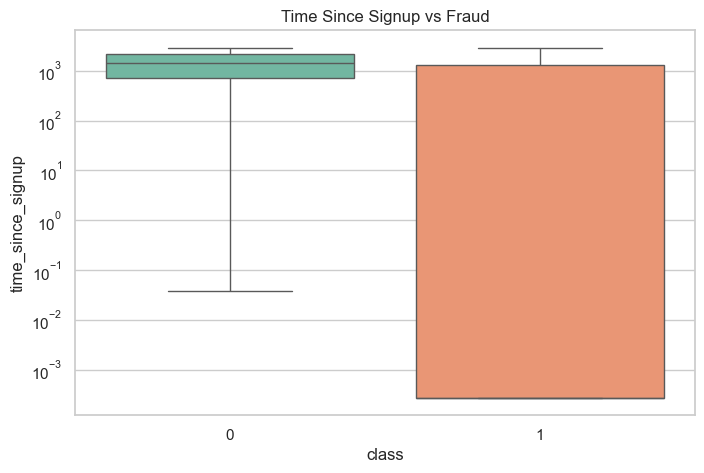

In [46]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_fraud,
    x='class',
    y='time_since_signup',
    palette='Set2'
)
plt.yscale('log')
plt.title("Time Since Signup vs Fraud")
plt.show()


### Fraud by hour of the day

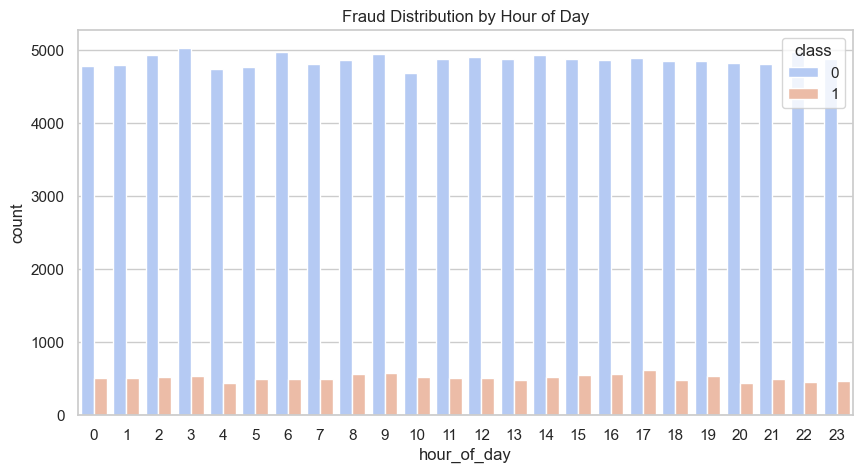

In [47]:
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df_fraud,
    x='hour_of_day',
    hue='class',
    palette='coolwarm'
)
plt.title("Fraud Distribution by Hour of Day")
plt.show()


# Data trasnformation

In [48]:
# Numerical features
numerical_cols = df_fraud.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Exclude target column 'class'
numerical_cols = [col for col in numerical_cols if col != 'class']

# Categorical features
categorical_cols = df_fraud.select_dtypes(include=['object']).columns.tolist()
# Include engineered categorical features if any


# Scaling Numerical Features

* Why StandardScaler Is Usually Better for Fraud

    * Reduces dominance of extreme values
    * Preserves anomaly structure without squashing
    * Works better with SMOTE and imbalance techniques
    * More stable for cross-validation

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_fraud[numerical_cols] = scaler.fit_transform(df_fraud[numerical_cols])

In [56]:
print(sorted(df_fraud[numerical_cols].columns))

['age', 'ip_address', 'ip_int', 'lower_bound_ip_address', 'purchase_value', 'time_since_last_tx', 'time_since_signup', 'tx_1h', 'tx_24h', 'upper_bound_ip_address', 'user_id', 'user_tx_count']


# Encoding Categorical Features

### Encoding Categorical Features

* I used One-Hot Encoding for low-cardinality categorical features (e.g., browser, sex) and target encoding / frequency encoding for high-cardinality features (e.g., country, source) to avoid exploding dimensions.

In [54]:
print(sorted(df_fraud.columns))


['age', 'browser_FireFox', 'browser_IE', 'browser_Opera', 'browser_Safari', 'class', 'country_freq', 'day_of_week', 'device_id', 'hour_of_day', 'ip_address', 'ip_int', 'lower_bound_ip_address', 'purchase_time', 'purchase_value', 'sex_M', 'signup_time', 'source_Direct', 'source_SEO', 'time_since_last_tx', 'time_since_signup', 'tx_1h', 'tx_24h', 'upper_bound_ip_address', 'user_id', 'user_tx_count']


In [60]:
categorical_cols = ['sex', 'browser', 'source']

existing_cats = [col for col in categorical_cols if col in df_fraud.columns]

if existing_cats:
    df_fraud = pd.get_dummies(
        df_fraud,
        columns=existing_cats,
        drop_first=True
    )
else:
    print("Categorical features already encoded — skipping one-hot encoding.")



Categorical features already encoded — skipping one-hot encoding.


In [61]:
df_fraud.filter(regex='^(sex_|browser_|source_)').head()


,sex_M,browser_FireFox,browser_IE,browser_Opera,browser_Safari,source_Direct,source_SEO
0,False,False,False,False,False,False,True
1,False,False,False,False,True,True,False
2,True,False,False,False,False,False,True
3,True,False,False,False,True,False,False
4,True,False,True,False,False,True,False


In [62]:
print("Numerical Columns after scaling:", numerical_cols)
print("Categorical columns after encoding:", [col for col in df_fraud.columns if col not in numerical_cols + ['class']])


Numerical Columns after scaling: ['user_id', 'purchase_value', 'age', 'ip_address', 'ip_int', 'lower_bound_ip_address', 'upper_bound_ip_address', 'time_since_signup', 'user_tx_count', 'time_since_last_tx', 'tx_1h', 'tx_24h']
Categorical columns after encoding: ['purchase_time', 'signup_time', 'device_id', 'hour_of_day', 'day_of_week', 'sex_M', 'browser_FireFox', 'browser_IE', 'browser_Opera', 'browser_Safari', 'source_Direct', 'source_SEO', 'country_freq']


# Handling class imbalance 

## Train-Test split 

In [63]:
from sklearn.model_selection import train_test_split

X = df_fraud.drop(columns='class')
y = df_fraud['class']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


## Documenting class distributions before resampling 

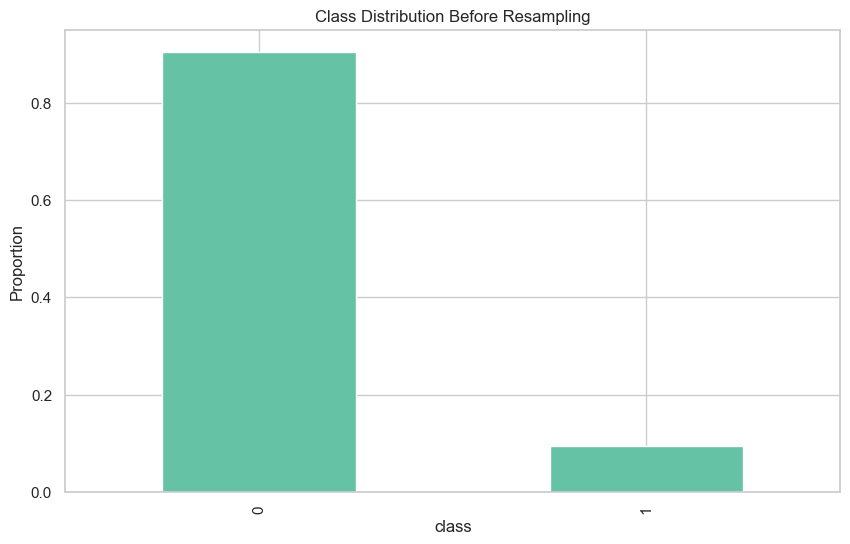

In [64]:
import pandas as pd

before_dist = pd.Series(y_train).value_counts(normalize=True)
before_dist

# visualization
import matplotlib.pyplot as plt

before_dist.plot(
    kind='bar',
    title='Class Distribution Before Resampling',
    ylabel='Proportion'
)
plt.show()


## justification for choosing SMOTE



| Reason                                 | Explanation         |
| ---------------------------------------| ------------------- |
| Keeps all real data                    | No information loss |
| Generates synthetic fraud cases        | Rapid-fire attacks  |
| Works well with tree & linear models   | Burst behavior      |




## Apply SMOTE on traning data 

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(
    X_train,
    y_train
)


## Class Distribution AFTER Resampling

In [ ]:
after_counts = y_train_resampled.value_counts()
after_ratio = y_train_resampled.value_counts(normalize=True)

print("Class counts after SMOTE:\n", after_counts)
print("\nClass ratio after SMOTE:\n", after_ratio)

# visualization
sns.barplot(
    x=after_counts.index,
    y=after_counts.values,
    palette='Set1'
)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Number of Transactions')
plt.show()


## Before vs After Comparison

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(
    x=before_counts.index,
    y=before_counts.values,
    ax=axes[0],
    palette='Set2'
)
axes[0].set_title('Before Resampling')

sns.barplot(
    x=after_counts.index,
    y=after_counts.values,
    ax=axes[1],
    palette='Set1'
)
axes[1].set_title('After SMOTE')

plt.show()
